# Exploration:

In this notebook, we will conduct an initial exploration of the customer dataset. The primary objective is to understand the structure of the data, identify key features, and perform preliminary analyses to uncover insights about customer behavior.

## Objectives

- Load and examine the dataset
- Analyze the distribution of key features
- Identify any missing or anomalous values
- Generate visualizations to represent customer demographics and engagement with promotional campaigns

## Dataset Overview

The dataset contains various attributes related to customer demographics, purchasing behavior, and responses to marketing campaigns. Understanding these attributes is crucial for further analysis and modeling.

Let's begin our exploration by loading the necessary libraries and the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns


%run ../customer_personality_analysis/utils/pandas_explorer.py
%run ../customer_personality_analysis/utils/pandas_missing_handler.py

## Data Load and Frist Visualization:

In [2]:
path = '../customer_personality_analysis/data/marketing_campaign.csv'
df = pd.read_csv(path, sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Getting some basin information about the dataset:

In [3]:
print(df.shape)
df.dtypes

(2240, 29)


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## Features Description:
- ID (int64): Unique identifier for each customer.
- Year_Birth (int64): Year of birth of the customer.
- Education (object): Educational level of the customer (as text).
- Marital_Status (object): Marital status of the customer (as text).
- Income (float64): Annual income of the customer.
- Kidhome (int64): Number of children living at home.
- Teenhome (int64): Number of teenagers living at home.
- Dt_Customer (object): Date when the customer joined the company. (This should be converted to a date (datetime) format.)
- Recency (int64): Days since the customer's last purchase.
- MntWines (int64): Amount spent on wine.
- MntFruits (int64): Amount spent on fruits.
- MntMeatProducts (int64): Amount spent on meat products.
- MntFishProducts (int64): Amount spent on fish products.
- MntSweetProducts (int64): Amount spent on sweets.
- MntGoldProds (int64): Amount spent on gold products.
- NumDealsPurchases (int64): Number of purchases made with a discount.
- NumWebPurchases (int64): Number of purchases made through the website.
- NumCatalogPurchases (int64): Number of purchases made through catalogs.
- NumStorePurchases (int64): Number of purchases made in physical stores.
- NumWebVisitsMonth (int64): Number of website visits in the last month.
- AcceptedCmp3 (int64): Whether the customer accepted the third promotional campaign.
- AcceptedCmp4 (int64): Whether the customer accepted the fourth promotional campaign.
- AcceptedCmp5 (int64): Whether the customer accepted the fifth promotional campaign.
- AcceptedCmp1 (int64): Whether the customer accepted the first promotional campaign.
- AcceptedCmp2 (int64): Whether the customer accepted the second promotional campaign.
- Complain (int64): Whether the customer has lodged a complaint.
- Z_CostContact (int64): Contact cost, constant value.
- Z_Revenue (int64): Revenue per customer, constant value.
- Response (int64): Final response to the latest campaign.

## Looking for Duplicates:

In [4]:
df[df.duplicated('ID')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


- There are no duplicated values in the dataset.

## Looking for missing values:

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
ID,0,0,0,0,0,0,0,0,0,0,0
Year_Birth,0,0,0,0,0,0,0,0,0,0,0
Education,0,0,0,0,0,0,0,0,0,0,0
Marital_Status,0,0,0,0,0,0,0,0,0,0,0
Income,24,0,0,0,0,0,0,0,0,0,24
Kidhome,0,0,0,0,0,0,0,0,0,0,0
Teenhome,0,0,0,0,0,0,0,0,0,0,0
Dt_Customer,0,0,0,0,0,0,0,0,0,0,0
Recency,0,0,0,0,0,0,0,0,0,0,0
MntWines,0,0,0,0,0,0,0,0,0,0,0


- The 'Income' column has some missing values (24)

## Features exploration:

### Year_Birth:

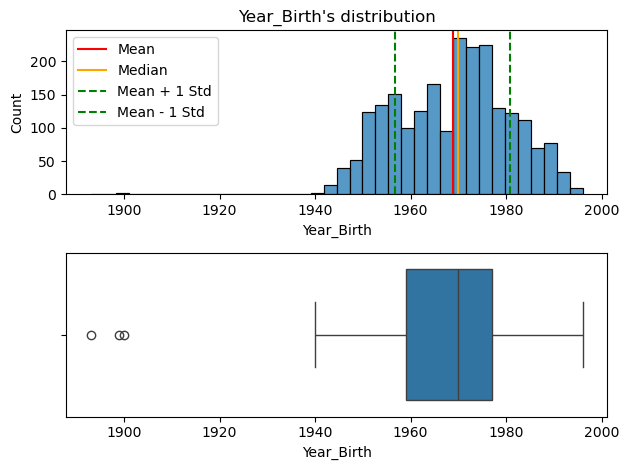

(None,
 Year_Birth
 1976    89
 1971    87
 1975    83
 1972    79
 1978    77
 1970    77
 1973    74
 1965    74
 1969    71
 1974    69
 1956    55
 1958    53
 1979    53
 1952    52
 1977    52
 1968    51
 1959    51
 1966    50
 1954    50
 1955    49
 1960    49
 1982    45
 1963    45
 1967    44
 1962    44
 1957    43
 1951    43
 1983    42
 1986    42
 1964    42
 1980    39
 1981    39
 1984    38
 1961    36
 1953    35
 1985    32
 1989    30
 1949    30
 1950    29
 1988    29
 1987    27
 1948    21
 1990    18
 1946    16
 1947    16
 1991    15
 1992    13
 1945     8
 1943     7
 1944     7
 1993     5
 1995     5
 1994     3
 1996     2
 1899     1
 1941     1
 1893     1
 1900     1
 1940     1
 Name: count, dtype: int64)

In [7]:
df.explorer.numerical_dist('Year_Birth')

- There are some outliers; it is necessary to address them.

### Education:

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

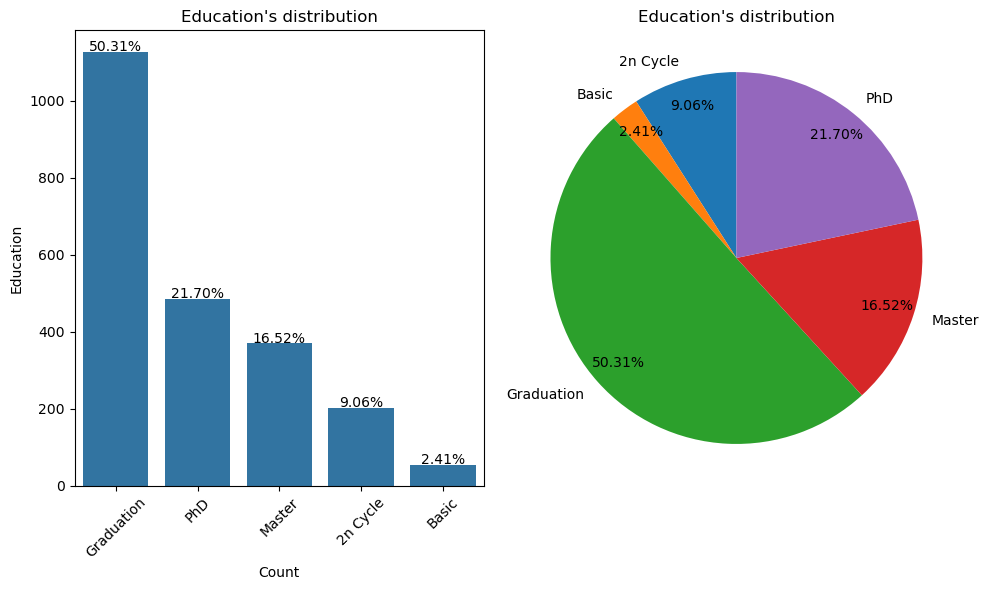

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('Education',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('Education')
df['Education'].value_counts()

- This is an ordinal categorical feature; it should be mapped using ordinal encoding.

### Marital_Status:

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

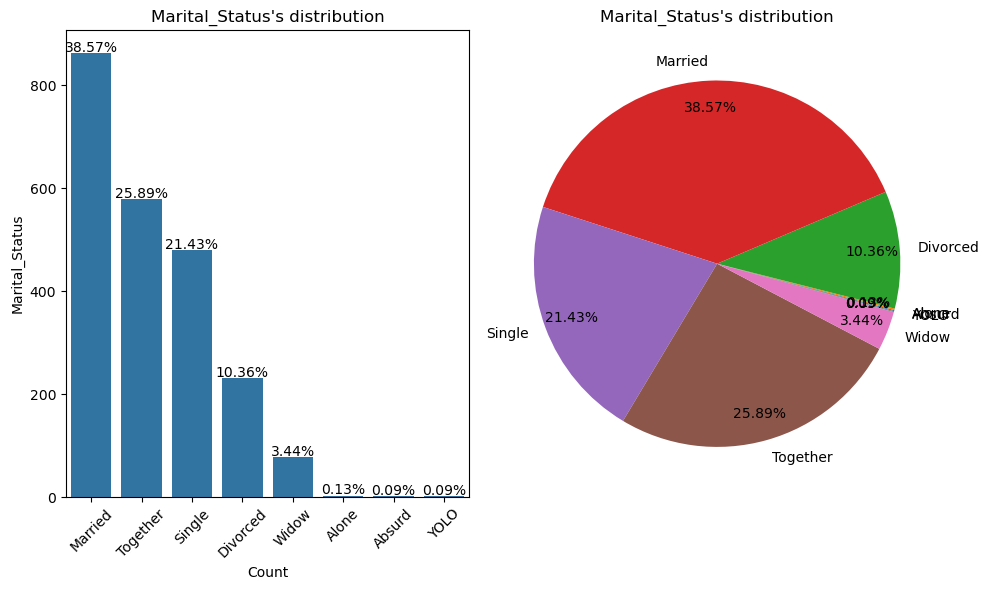

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('Marital_Status',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('Marital_Status', strangle=-15)
df['Marital_Status'].value_counts()

- There are some strange categories that can be treated as outliers; it is necessary to address them.

### Income:

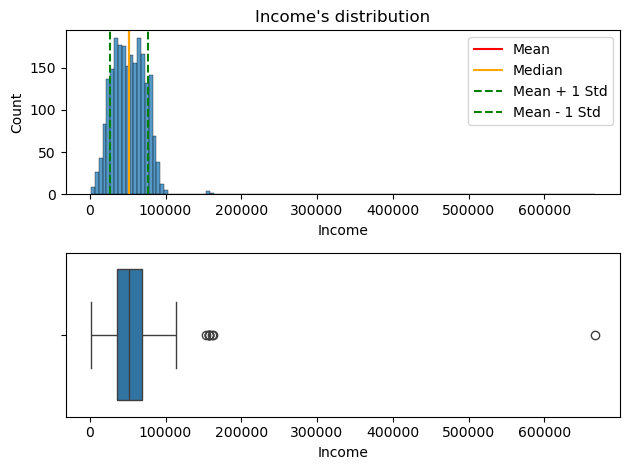

,values
count,2240.000000
mean,52247.251354
median,51381.500000
std,25173.076661
max,666666.000000
min,1730.000000
IQR,664936.000000
Q1,35303.000000
Q2,51381.500000
Q3,68522.000000


In [10]:
df.explorer.numerical_dist('Income')
df.explorer.feature_describe('Income')

- There are some outliers; it's necessary to address them.

### Kidhome:

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

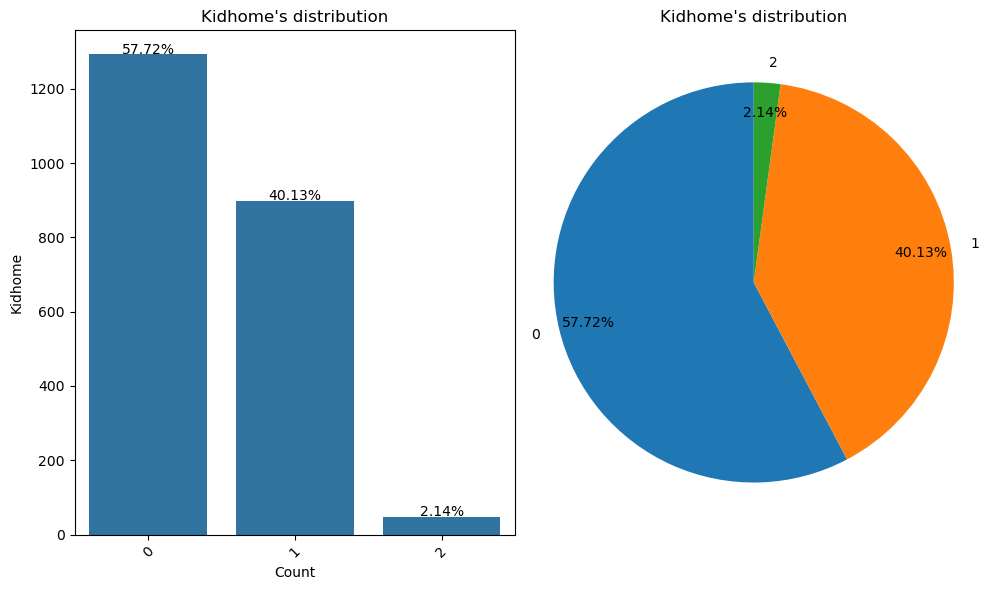

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('Kidhome',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('Kidhome')
df['Kidhome'].value_counts()

- Due to the fact that this feature only has 3 possible values (0, 1, and 2), it is appropriate to treat it as an ordinal categorical variable.

### Teenhome:

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

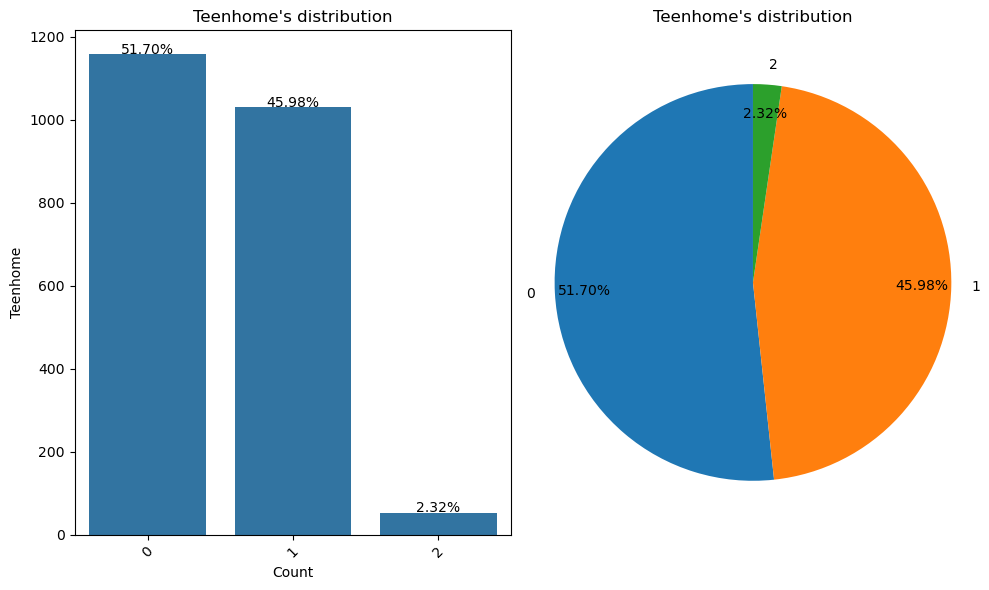

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('Teenhome',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('Teenhome')
df['Teenhome'].value_counts()

- Due to the fact that this feature only has 3 possible values (0, 1, and 2), it is appropriate to treat it as an ordinal categorical variable.

### Dt_Customer:

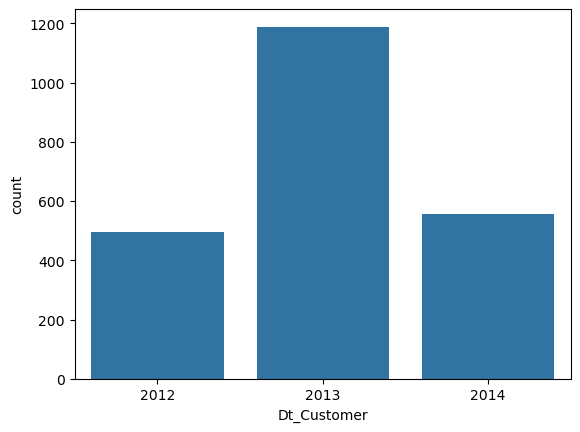

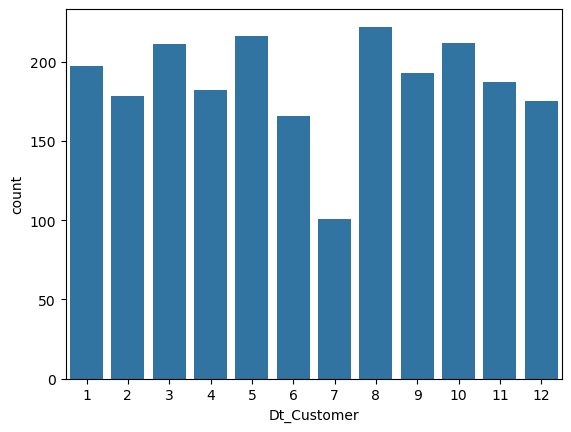

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
sns.barplot(
    data=df['Dt_Customer'].dt.year.sort_values(ascending=True).value_counts(),
)
plt.show()
sns.barplot(
    data=df['Dt_Customer'].dt.month.sort_values(ascending=True).value_counts(),
)
plt.show()

- These charts show that the year with the most joinings was 2013, with a number of records approximately double that of the other two years. Additionally, it shows that the month with the fewest joinings during these three years was July.

## Recency:

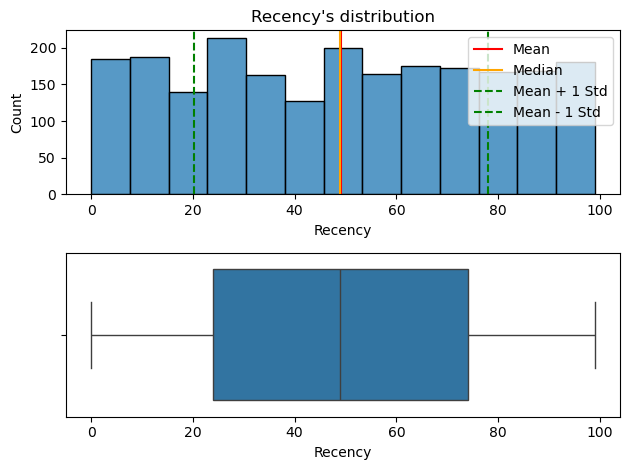

             values
count   2240.000000
mean      49.109375
median    49.000000
std       28.962453
max       99.000000
min        0.000000
IQR       99.000000
Q1        24.000000
Q2        49.000000
Q3        74.000000


In [14]:
df.explorer.numerical_dist('Recency')
print(df.explorer.feature_describe('Recency'))

- The dataset contains 2,240 entries, indicating a substantial sample size.
- The mean value is approximately 49.11, which suggests that, on average, customers have a recency score close to this value.
- The median value of 49.0 indicates that half of the customers have a recency score below this point, suggesting a symmetric distribution around the mean.
- The standard deviation of 28.96 shows considerable variability in the recency scores, implying that customers exhibit diverse behaviors regarding their recent engagement with the company.
- The minimum and maximum values are 0 and 99, respectively, indicating that recency scores range from no recent engagement (0) to maximum engagement (99).
- The interquartile range (IQR) of 99 indicates a wide spread between the first quartile (Q1: 24.0) and the third quartile (Q3: 74.0), further confirming the variability in recency scores among customers.

### MntWines:

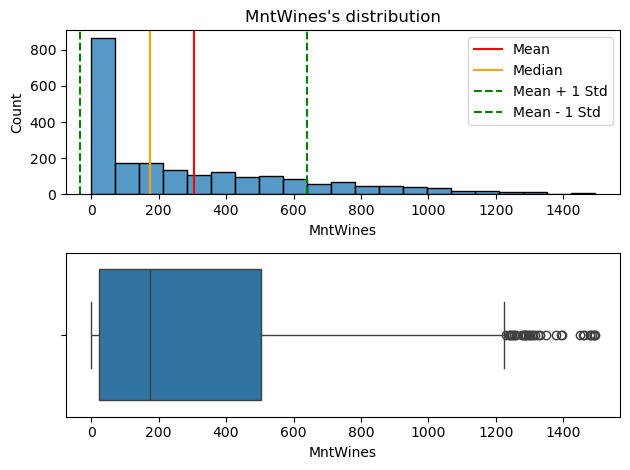

             values
count   2240.000000
mean     303.935714
median   173.500000
std      336.597393
max     1493.000000
min        0.000000
IQR     1493.000000
Q1        23.750000
Q2       173.500000
Q3       504.250000


In [15]:
df.explorer.numerical_dist('MntWines')
print(df.explorer.feature_describe('MntWines'))

In [16]:
print(f"The number of records with a MntWines value greater than or equal to 1200 is: {df['MntWines'][df['MntWines'] >= 1200].shape[0]}")

The number of records with a MntWines value greater than or equal to 1200 is: 44


- The chart shows a right-skewed distribution with a large concentration of records near 0.

### MntFruits:

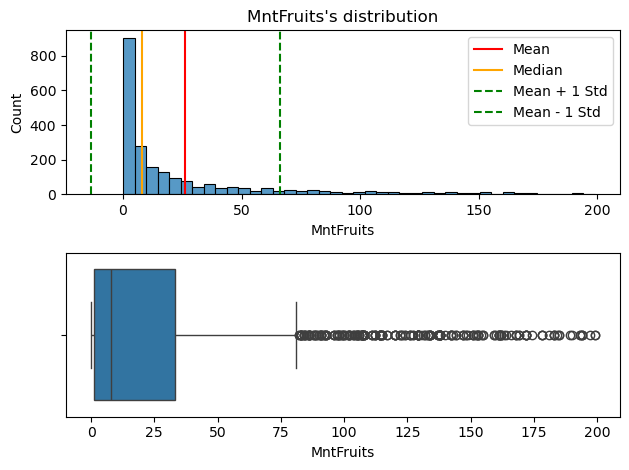

,values
count,2240.000000
mean,26.302232
median,8.000000
std,39.773434
max,199.000000
min,0.000000
IQR,199.000000
Q1,1.000000
Q2,8.000000
Q3,33.000000


In [17]:
df.explorer.numerical_dist('MntFruits')
df.explorer.feature_describe('MntFruits')

In [18]:
print(f"The number of records with a MntFruits value greater than or equal to Q3 (33) is: {df['MntFruits'][df['MntFruits'] >= 33].shape[0]}")

The number of records with a MntFruits value greater than or equal to Q3 (33) is: 565


- The chart displays a right-skewed distribution with a significant concentration of records near zero, while the boxplot indicates a large number of outliers; however, these appear to be valid data points.

### MntMeatProducts:

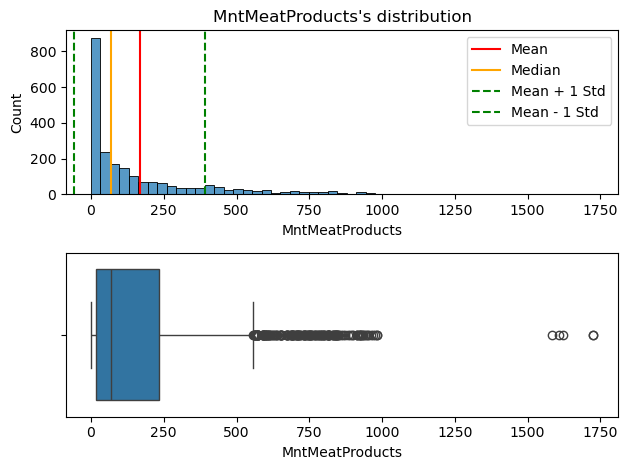

,values
count,2240.000000
mean,166.950000
median,67.000000
std,225.715373
max,1725.000000
min,0.000000
IQR,1725.000000
Q1,16.000000
Q2,67.000000
Q3,232.000000


In [19]:
df.explorer.numerical_dist('MntMeatProducts')
df.explorer.feature_describe('MntMeatProducts')


- The chart shows a right-skewed distribution with a large concentration of records near 0 and some outliers. It is necessary to address them.

### MntFishProducts:

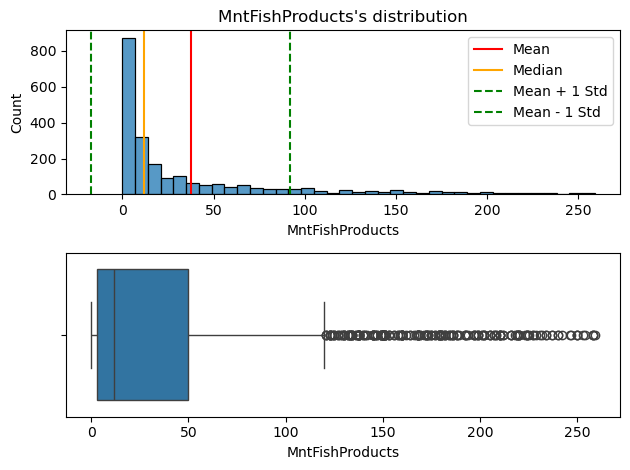

,values
count,2240.000000
mean,37.525446
median,12.000000
std,54.628979
max,259.000000
min,0.000000
IQR,259.000000
Q1,3.000000
Q2,12.000000
Q3,50.000000


In [20]:
df.explorer.numerical_dist('MntFishProducts')
df.explorer.feature_describe('MntFishProducts')

- The chart shows a right-skewed distribution with a large number of records near 0.

### MntSweetProducts:

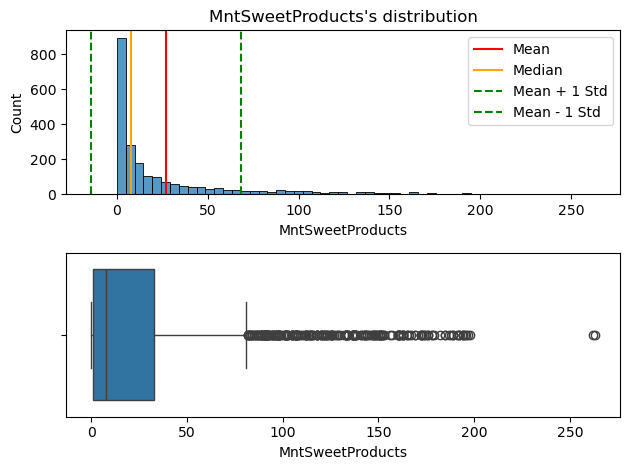

,values
count,2240.000000
mean,27.062946
median,8.000000
std,41.280498
max,263.000000
min,0.000000
IQR,263.000000
Q1,1.000000
Q2,8.000000
Q3,33.000000


In [21]:
df.explorer.numerical_dist('MntSweetProducts')
df.explorer.feature_describe('MntSweetProducts')

- The chart shows a right-skewed distribution with a large concentration of records near 0 and some outliers. It is necessary to address them.

### MntGoldProds:

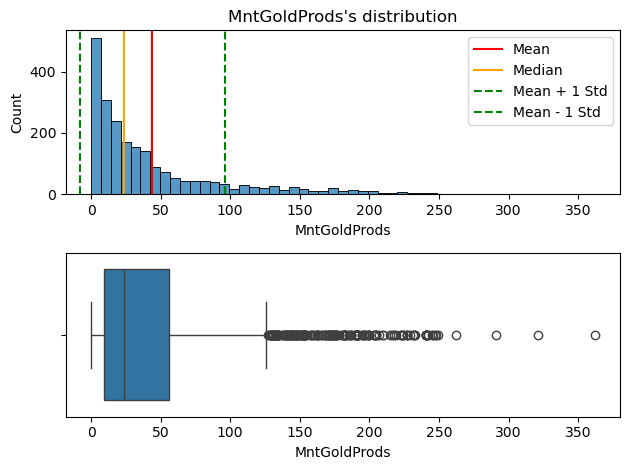

,Frequency,Percentage
MntGoldProds,,
171,1,0.044643
231,1,0.044643
158,1,0.044643
123,1,0.044643
165,1,0.044643
178,1,0.044643
169,1,0.044643
132,1,0.044643
262,1,0.044643


In [22]:
df.explorer.numerical_dist('MntGoldProds')
df.explorer.feature_describe('MntGoldProds')
df.explorer.frequency_table('MntGoldProds').tail(10)

- The chart shows a right-skewed distribution with a large concentration of records near 0 and some outliers. It is necessary to address them.

### NumDealsPurchases:

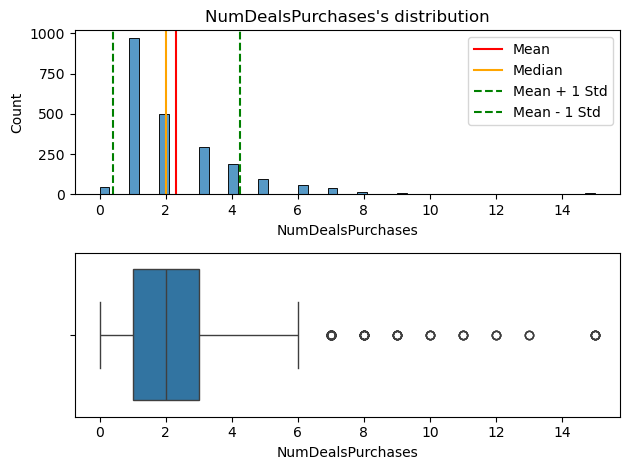

             values
count   2240.000000
mean       2.325000
median     2.000000
std        1.932238
max       15.000000
min        0.000000
IQR       15.000000
Q1         1.000000
Q2         2.000000
Q3         3.000000


,Frequency,Percentage
NumDealsPurchases,,
1,970,43.303571
2,497,22.187500
3,297,13.258929
4,189,8.437500
5,94,4.196429
6,61,2.723214
0,46,2.053571
7,40,1.785714
8,14,0.625000


In [23]:
df.explorer.numerical_dist('NumDealsPurchases')
print(df.explorer.feature_describe('NumDealsPurchases'))
df.explorer.frequency_table('NumDealsPurchases')

- The chart shows a right-skewed distribution with a large concentration of records near 1.

### NumWebPurchases:

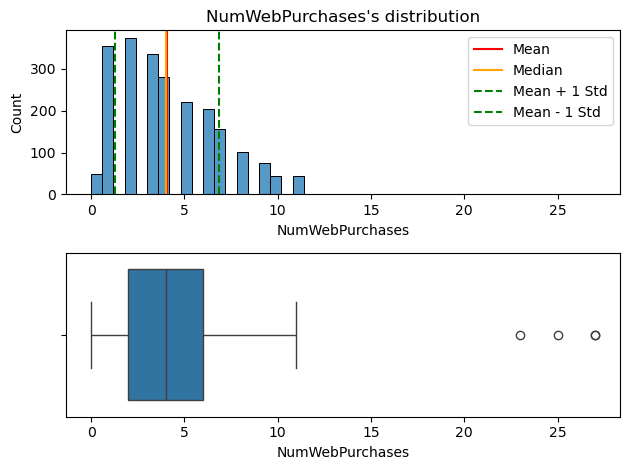

             values
count   2240.000000
mean       4.084821
median     4.000000
std        2.778714
max       27.000000
min        0.000000
IQR       27.000000
Q1         2.000000
Q2         4.000000
Q3         6.000000


,Frequency,Percentage
NumWebPurchases,,
2,373,16.651786
1,354,15.803571
3,336,15.000000
4,280,12.500000
5,220,9.821429
6,205,9.151786
7,155,6.919643
8,102,4.553571
9,75,3.348214


In [24]:
df.explorer.numerical_dist('NumWebPurchases')
print(df.explorer.feature_describe('NumWebPurchases'))
df.explorer.frequency_table('NumWebPurchases')

- The chart shows a right-skewed distribution with a large concentration of records near 2 and some outliers. It is necessary to address them.

### NumCatalogPurchases:

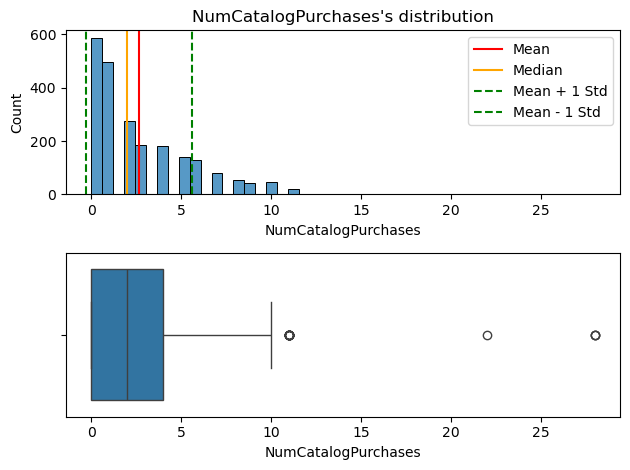

             values
count   2240.000000
mean       2.662054
median     2.000000
std        2.923101
max       28.000000
min        0.000000
IQR       28.000000
Q1         0.000000
Q2         2.000000
Q3         4.000000


,Frequency,Percentage
NumCatalogPurchases,,
0,586,26.160714
1,497,22.187500
2,276,12.321429
3,184,8.214286
4,182,8.125000
5,140,6.250000
6,128,5.714286
7,79,3.526786
8,55,2.455357


In [25]:
df.explorer.numerical_dist('NumCatalogPurchases')
print(df.explorer.feature_describe('NumCatalogPurchases'))
df.explorer.frequency_table('NumCatalogPurchases')

- The chart shows a right-skewed distribution with a large concentration of records near 0 and some outliers. It is necessary to address them.

### NumStorePurchases:

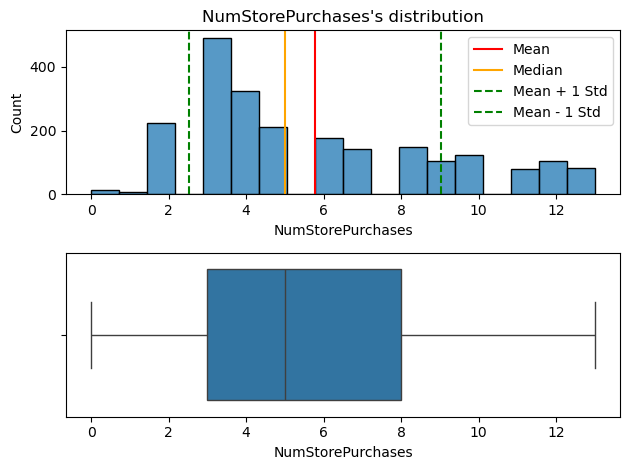

             values
count   2240.000000
mean       5.790179
median     5.000000
std        3.250958
max       13.000000
min        0.000000
IQR       13.000000
Q1         3.000000
Q2         5.000000
Q3         8.000000


,Frequency,Percentage
NumStorePurchases,,
3,490,21.875000
4,323,14.419643
2,223,9.955357
5,212,9.464286
6,178,7.946429
8,149,6.651786
7,143,6.383929
10,125,5.580357
9,106,4.732143


In [39]:
df.explorer.numerical_dist('NumStorePurchases')
print(df.explorer.feature_describe('NumStorePurchases'))
df.explorer.frequency_table('NumStorePurchases')

- The chart shows a right-skewed distribution, with a large concentration of data points near 3 without outliers.

#### NumWebVisitsMonth:

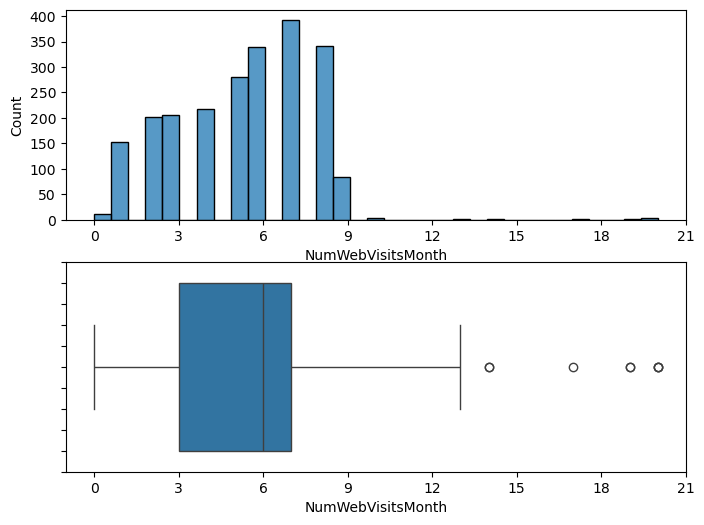

             values
count   2240.000000
mean       5.316518
median     6.000000
std        2.426645
max       20.000000
min        0.000000
IQR       20.000000
Q1         3.000000
Q2         6.000000
Q3         7.000000


,Frequency,Percentage
NumWebVisitsMonth,,
7,393,17.544643
8,342,15.267857
6,340,15.178571
5,281,12.544643
4,218,9.732143
3,205,9.151786
2,202,9.017857
1,153,6.830357
9,83,3.705357


In [27]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.histplot(
    data=df,
    x='NumWebVisitsMonth',
)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.subplot(2,1,2)
sns.boxplot(
    data=df,
    x='NumWebVisitsMonth'
)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
print(df.explorer.feature_describe('NumWebVisitsMonth'))
df.explorer.frequency_table('NumWebVisitsMonth')

- The chart shows a right-skewed distribution with a large concentration of records near 7 and some outliers. It is necessary to address them.

### AcceptedCmp3:

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

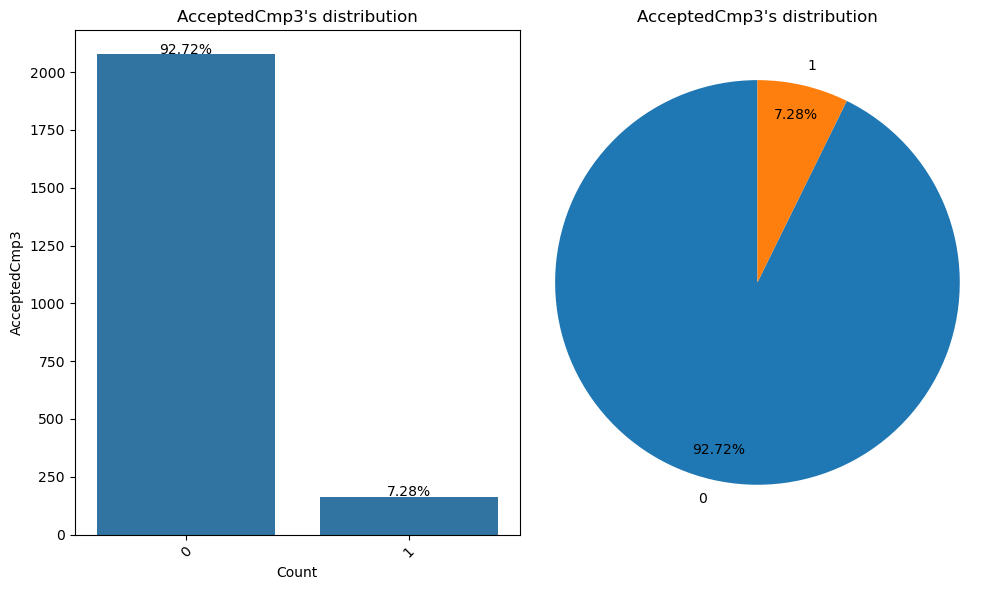

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('AcceptedCmp3',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('AcceptedCmp3')
df['AcceptedCmp3'].value_counts()

- The chart shows a larger number of records for customers who did not accept the third promotional campaign.

### AcceptedCmp4:

AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

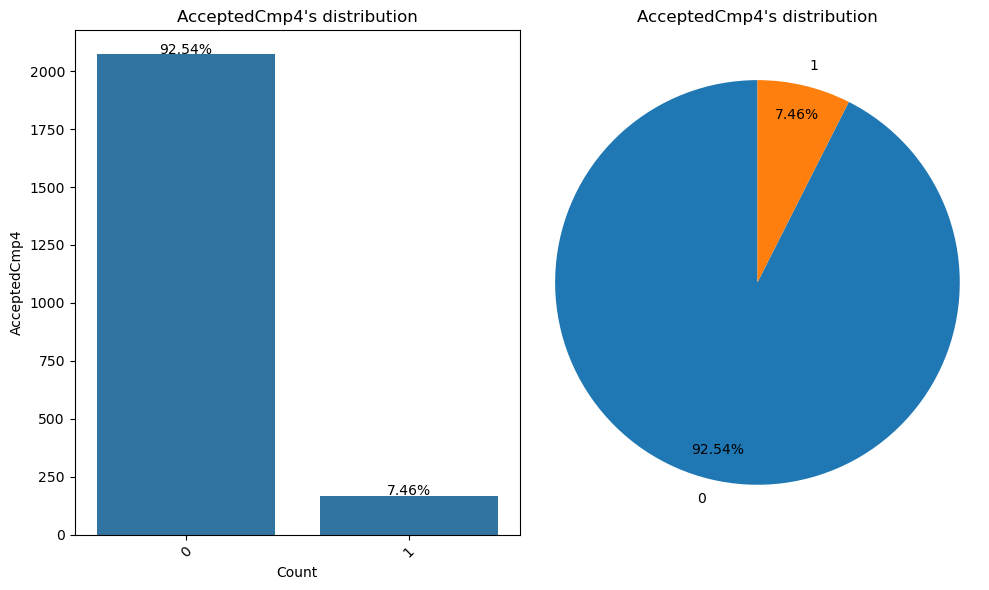

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('AcceptedCmp4',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('AcceptedCmp4')
df['AcceptedCmp4'].value_counts()

- The chart shows a larger number of records for customers who did not accept the fourth promotional campaign.

### AcceptedCmp5:


AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

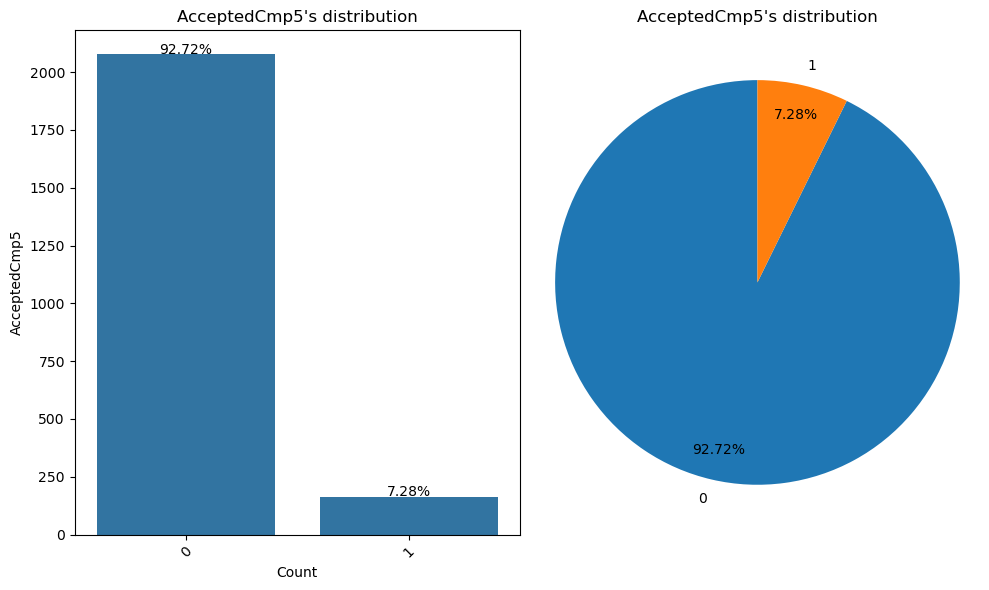

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('AcceptedCmp5',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('AcceptedCmp5')
df['AcceptedCmp5'].value_counts()

- The chart shows a larger number of records for customers who did not accept the fifth promotional campaign.

### AcceptedCmp1:

AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

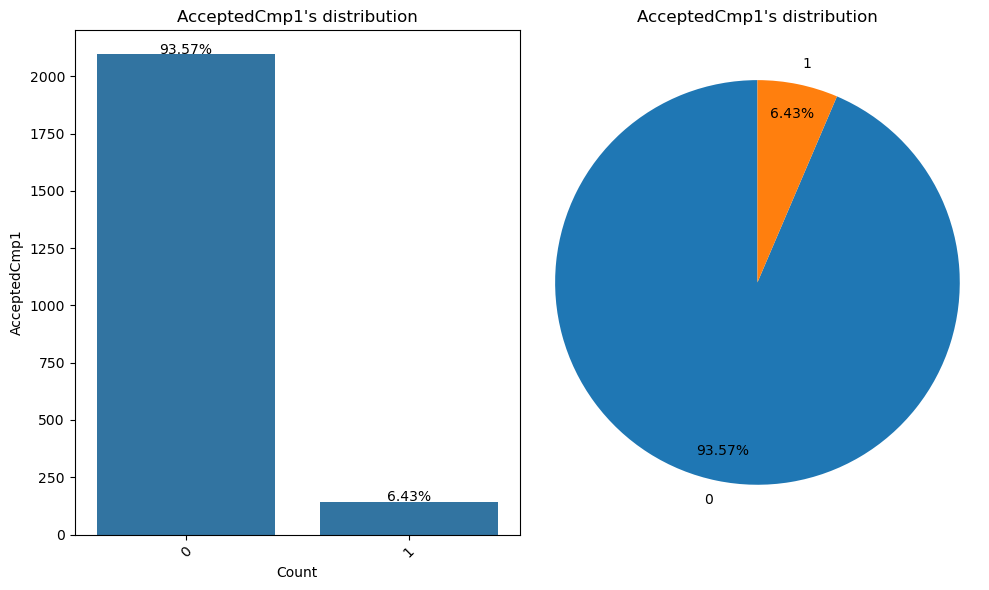

In [31]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('AcceptedCmp1',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('AcceptedCmp1')
df['AcceptedCmp1'].value_counts()

- The chart shows a larger number of records for customers who did not accept the first promotional campaign.

### AcceptedCmp2:

AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

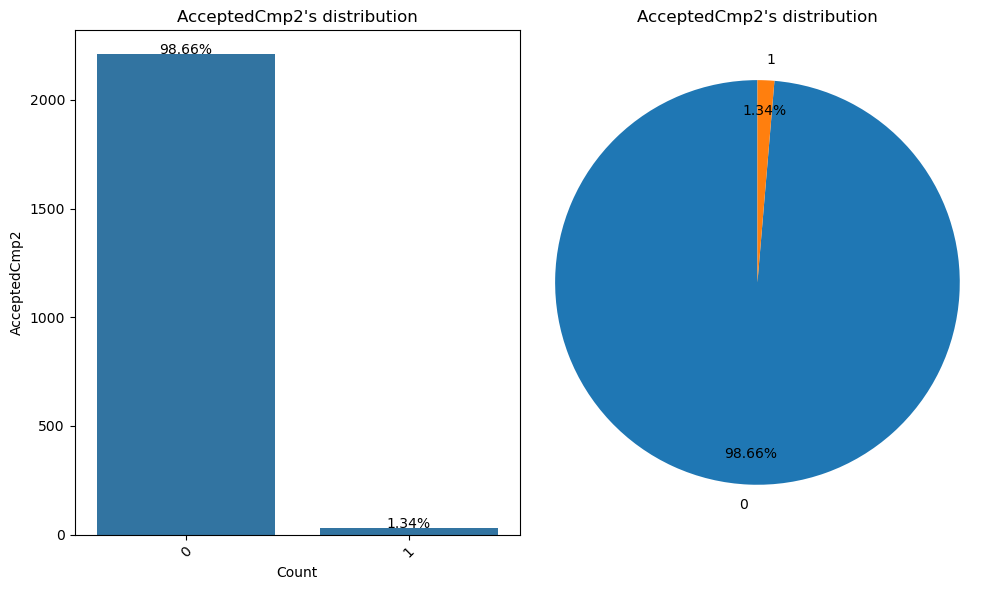

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('AcceptedCmp2',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('AcceptedCmp2')
df['AcceptedCmp2'].value_counts()

- The chart shows a larger number of records for customers who did not accept the second promotional campaign.

### AcceptedCmp 1-5

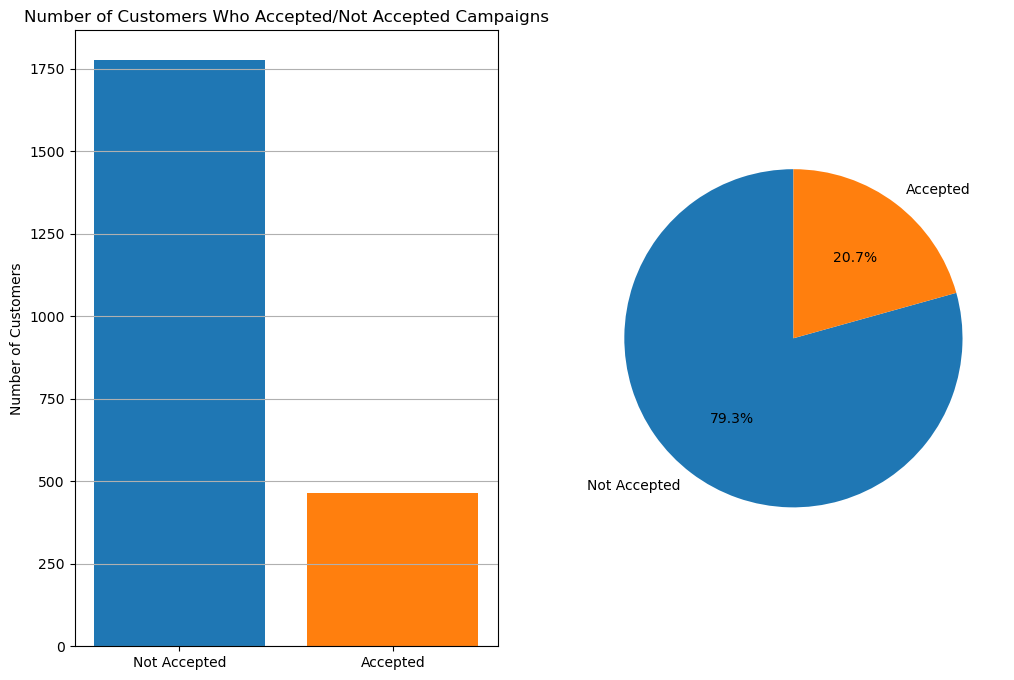

In [33]:
# Create the filter for customers who did not accept any campaign
filter_ = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] == 0 

# Define the sizes of the slices for the charts
slices = [df[filter_].shape[0],df[~filter_].shape[0]]
labels = ['Not Accepted','Accepted']

# Create the visualization
plt.figure(figsize=(12,8))

# Bar chart
plt.subplot(1,2,1)
plt.bar(
    height = slices,
    x = labels,
    color=plt.get_cmap('tab10').colors 
)
plt.title('Number of Customers Who Accepted/Not Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.subplot(1,2,2)
plt.pie(
    x=slices,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.show()

- These charts show that most customers did not accept any of the promotional campaigns.

### Complain:

Complain
0    2219
1      21
Name: count, dtype: int64

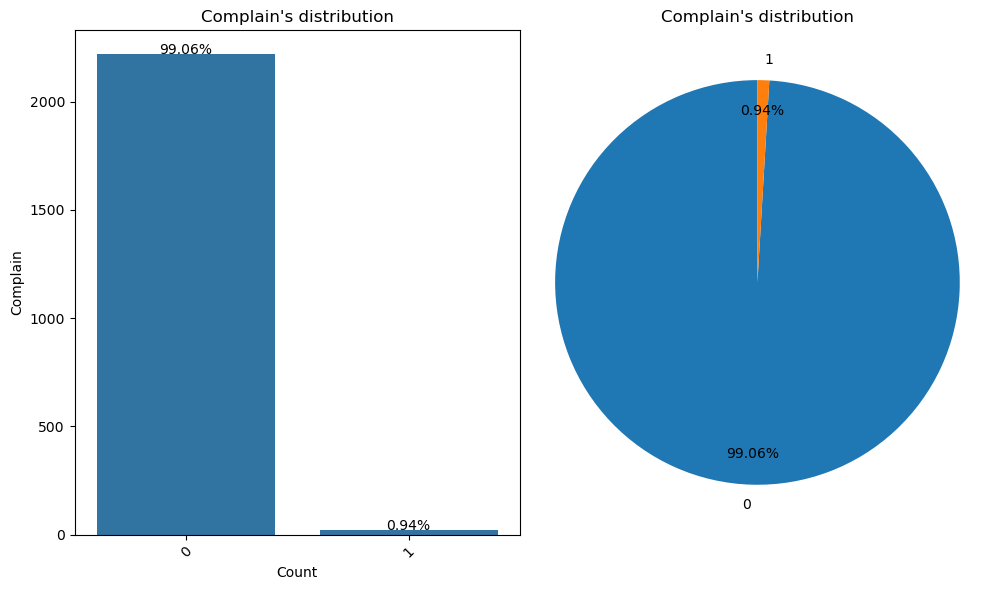

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('Complain',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('Complain')
df['Complain'].value_counts()

- This chart shows that only a small number of customers have complained.

### Z_Revenue / Z_CostContact:

In [35]:
print(f"The contact cost is: {df['Z_CostContact'][0]}\n The revenue per customer is: {df['Z_Revenue'][0]}\n The Z_Revenue/Z_costContact ratio is: {round(df['Z_Revenue'][0] / df['Z_CostContact'][0],2)}")

The contact cost is: 3
 The revenue per customer is: 11
 The Z_Revenue/Z_costContact ratio is: 3.67


- A ratio of 3.67 means that for every unit of cost (3) spent on contacting customers, the company generates approximately 3.67 units of revenue. This is a positive sign of financial health, as it shows that the company is effectively converting contact costs into revenue.

### Response:

Response
0    1906
1     334
Name: count, dtype: int64

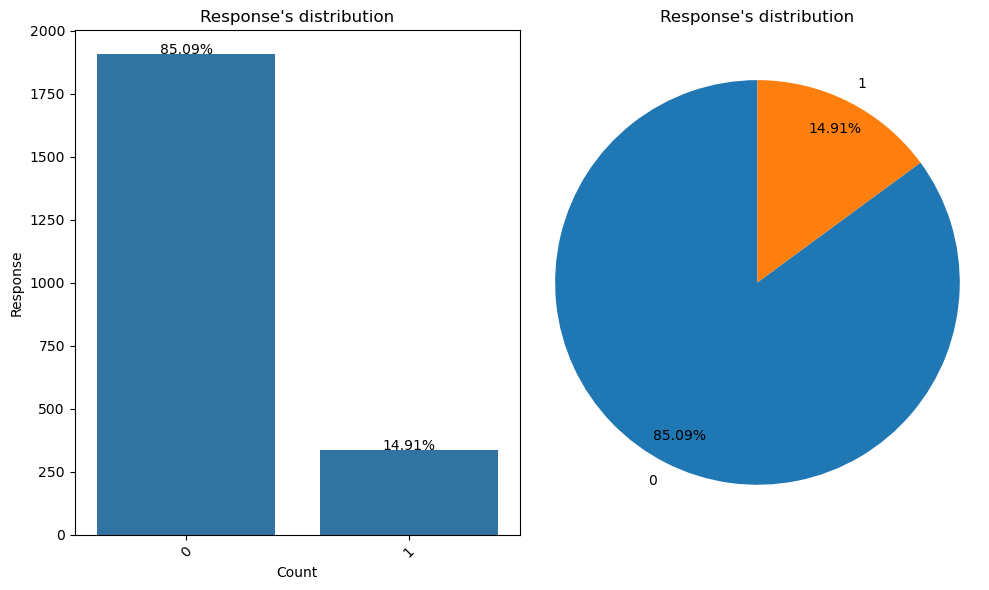

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.explorer.categorical_dist('Response',45)
plt.subplot(1,2,2)
df.explorer.dist_pieplot('Response')
df['Response'].value_counts()

- This chart shows that most of the customers gave a negative response to the last campaign.

## Correlationship Analysis:

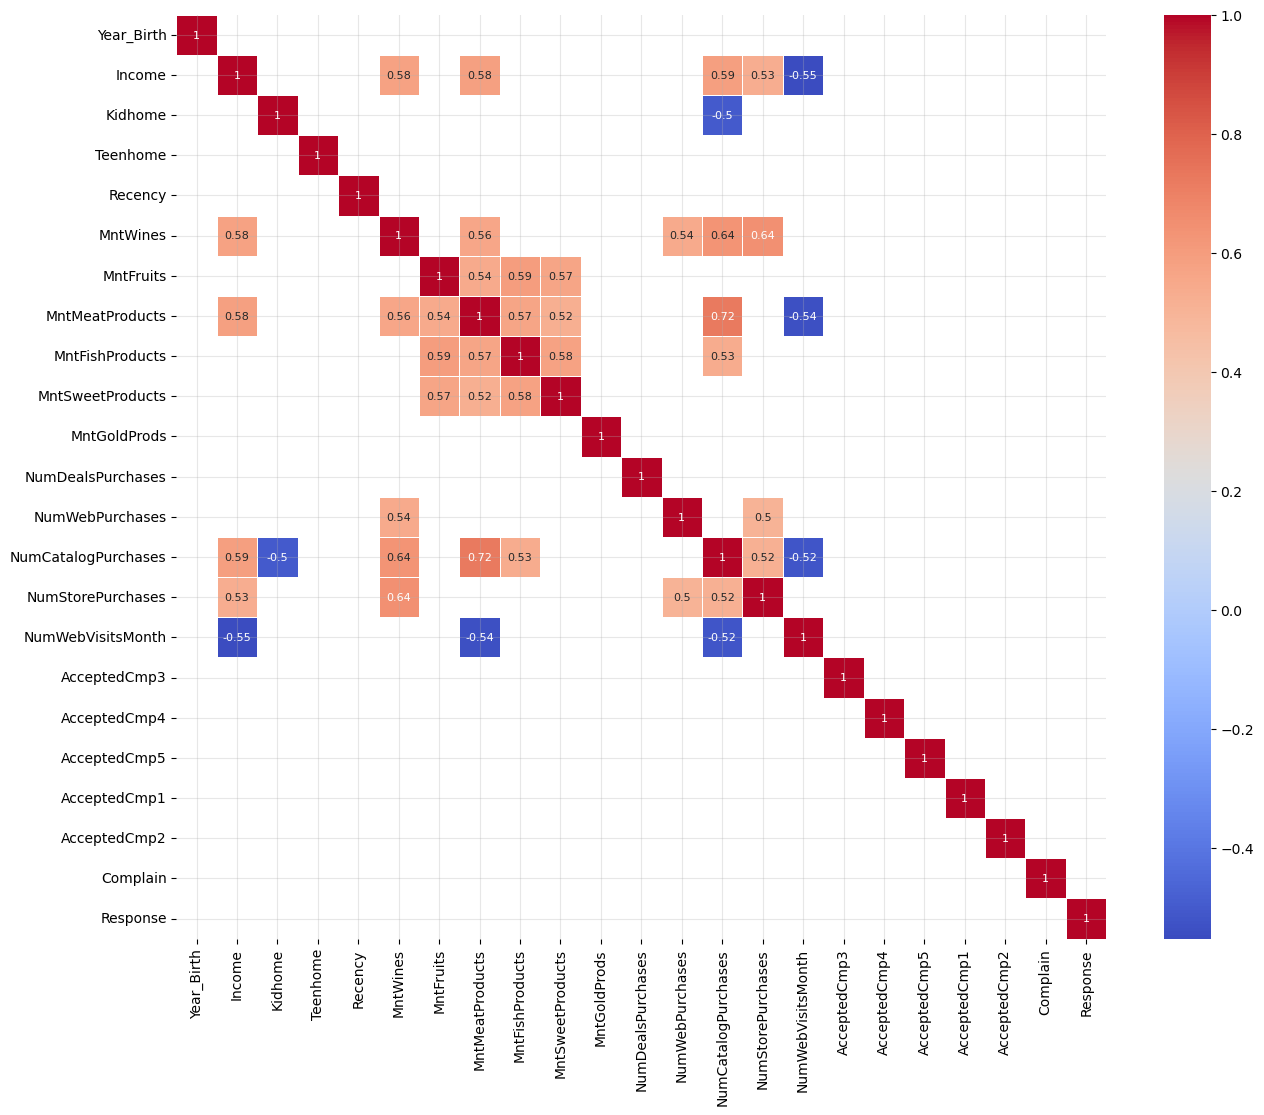

In [37]:
numerical_features = df.select_dtypes(include=[np.number]).drop(columns=["ID","Z_CostContact","Z_Revenue"])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(15,12))
sns.heatmap(
    data=correlation_matrix.where(correlation_matrix.abs() > 0.5),
    cmap='coolwarm',
    linewidths=.5,
    annot=True,
    annot_kws={"fontsize": 8}
)
plt.grid(True, alpha=0.3)
plt.show()

- There are no extremely high correlations between features (above 0.9), which means there is no severe multicollinearity.

# Conclusions

In this exploration, several key insights were obtained regarding the customer dataset:

1. **Customer Demographics**:
   - A diverse range of customer profiles was identified, including variations in age, income, and marital status. This diversity may influence marketing strategies and campaign effectiveness.

2. **Engagement with Campaigns**:
   - Analysis of the promotional campaign acceptance rates revealed that a significant portion of customers did not engage with any of the campaigns. This suggests potential opportunities for improving marketing outreach and targeting.

3. **Complaints**:
   - The data indicated that a small number of customers have complained, suggesting that customer satisfaction may be relatively high. However, further analysis may be required to understand the factors contributing to complaints.

4. **Financial Metrics**:
   - The customer acquisition cost (Z_CostContact) and revenue per customer (Z_Revenue) were calculated, indicating a healthy Z_Revenue/Z_CostContact ratio of 3.67. This suggests that the company generates significantly more revenue than the cost incurred for customer acquisition, highlighting effective marketing strategies.

5. **Outliers and Data Quality**:
   - Several outliers were detected in the dataset, particularly in spending categories. While some of these outliers may represent valid data points, further investigation is necessary to determine their impact on analyses.
6. **Correlation Analysis**:
   - There are no extremely high correlations between features (above 0.9), which means there is no severe multicollinearity.
   
Overall, this exploratory analysis provides a foundational understanding of the customer dataset, paving the way for more in-depth analyses and model development in subsequent stages of the project.
